<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metoda Monte Carlo

Převzato z https://github.com/SamuelHunter/Buffon/blob/master/buffon.py

L = 30
N = 50
W = 40
C = ???


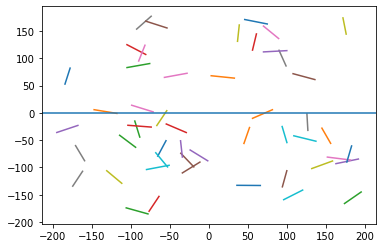

In [6]:
import matplotlib.pyplot as plt
import random
from math import cos, sin, pi

def plotLine(sx, sy, ex, ey):
  plt.plot([sx, ex], [sy, ey])

#Estimating Pi using Buffon's Needle # www.101compiting.net/estimating-pi-using-buffons-needle
#import turtle

boardWidth = 40
needleLength = 30
numberOfNeedles = 50
    
#myPen = turtle.Turtle()
#myPen.hideturtle()
#myPen.speed(0)

y=180
#Draw floor boards
#for i in range(0,10):
#  myPen.penup()
#  myPen.goto(-200,y)
#  myPen.pendown()
#  myPen.goto(200,y)
#  y-=boardWidth

#Draw Needles
#myPen.color("#f442d1")
count = 0
for needle in range(0,numberOfNeedles):
  xs = random.randint(-180, 180)
  ys = random.randint(-180, 180)
  angle = random.random() * 2 * pi
  xe = xs + needleLength * cos(angle)
  ye = ys + needleLength * sin(angle)

  if (ys <= 0) and (ye >= 0):
    count = count + 1
  plotLine(xs, ys, xe, ye)
  
plt.axhline()

print("L = " + str(needleLength))
print("N = " + str(numberOfNeedles))
print("W = " + str(boardWidth))
print("C = ???")
